In [1]:
# loading required packages and libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# loading the dataset
df = pd.read_parquet("../../02_Data/01_messidor_mapping.parquet")
df.sample(5)

,Image_ID,Department,Retinopathy_Grade,Risk_of_Macular_Edema,Data_Source,Split,Original_Size
757,20051020_53062_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2,Messidor,Train,"[2240, 1488]"
1127,20051214_51442_0100_PP.tif,Service Ophtalmologie Lariboisière,2,0,Messidor,Train,"[2240, 1488]"
944,20051213_62188_0100_PP.tif,Service Ophtalmologie Lariboisière,2,0,Messidor,Train,"[2240, 1488]"
800,20060412_61251_0200_PP.tif,CHU de St Etienne,1,0,Messidor,Train,"[1440, 960]"
899,20051207_62275_0400_PP.tif,LaTIM - CHU de BREST,1,0,Messidor,Train,"[2304, 1536]"


In [3]:
# converting from list to tuple
df["Original_Size"] = df["Original_Size"].apply(lambda x: tuple(x))

In [4]:
df["Original_Size"].value_counts()

Original_Size
(1440, 960)     588
(2240, 1488)    400
(2304, 1536)    212
Name: count, dtype: int64

In [5]:
df.groupby(["Original_Size", "Department"])[
    ["Department", "Original_Size"]
].value_counts().reset_index()

,Original_Size,Department,count
0,"(1440, 960)",CHU de St Etienne,400
1,"(1440, 960)",LaTIM - CHU de BREST,188
2,"(2240, 1488)",Service Ophtalmologie Lariboisière,400
3,"(2304, 1536)",LaTIM - CHU de BREST,212


In [6]:
for i in df["Original_Size"].value_counts().index:
    print(f"{i}: {i[0]/i[1]:.2f}")

(1440, 960): 1.50
(2240, 1488): 1.51
(2304, 1536): 1.50


In [7]:
# loading 1 image from each dataset to see the difference
path = "/Users/revanth/Downloads/Messidor/resize_samples/source_"

img_1 = Image.open(path + "1.tif")
img_2 = Image.open(path + "2.tif")
img_3 = Image.open(path + "3.tif")

print(f"Image 1: {img_1.size}")
print(f"Image 2: {img_2.size}")
print(f"Image 3: {img_3.size}")

Image 1: (2240, 1488)
Image 2: (1440, 960)
Image 3: (2304, 1536)


In [8]:
resize_val = (512, 512)

img_1_resized = img_1.resize(resize_val)
img_2_resized = img_2.resize(resize_val)
img_3_resized = img_3.resize(resize_val)

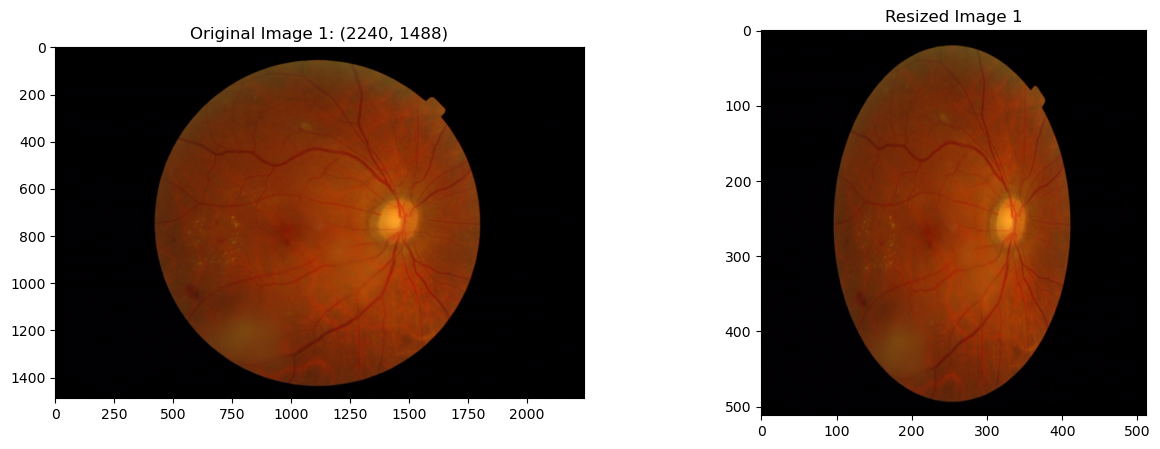

In [9]:
# plotting the original and resized images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img_1)
ax[0].set_title(f"Original Image 1: {img_1.size}")
ax[1].imshow(img_1_resized)
ax[1].set_title("Resized Image 1")
plt.show()

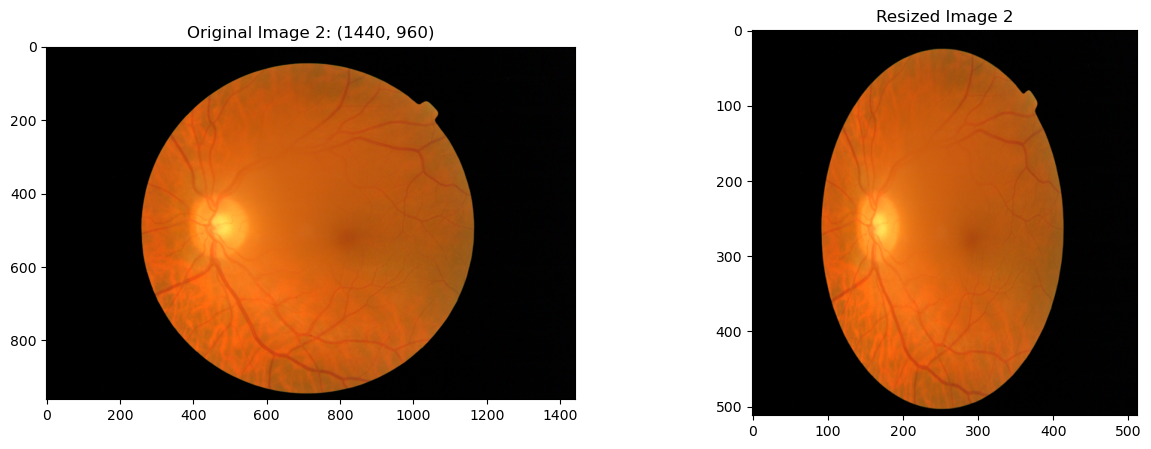

In [10]:
# plotting the original and resized images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img_2)
ax[0].set_title(f"Original Image 2: {img_2.size}")
ax[1].imshow(img_2_resized)
ax[1].set_title("Resized Image 2")
plt.show()

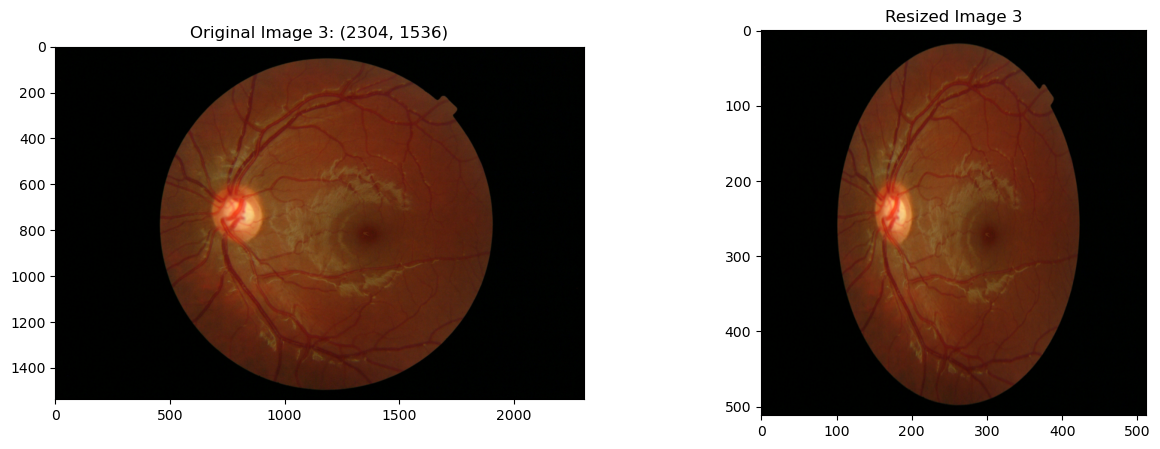

In [11]:
# plotting the original and resized images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img_3)
ax[0].set_title(f"Original Image 3: {img_3.size}")
ax[1].imshow(img_3_resized)
ax[1].set_title("Resized Image 3")
plt.show()

### Re-mapping

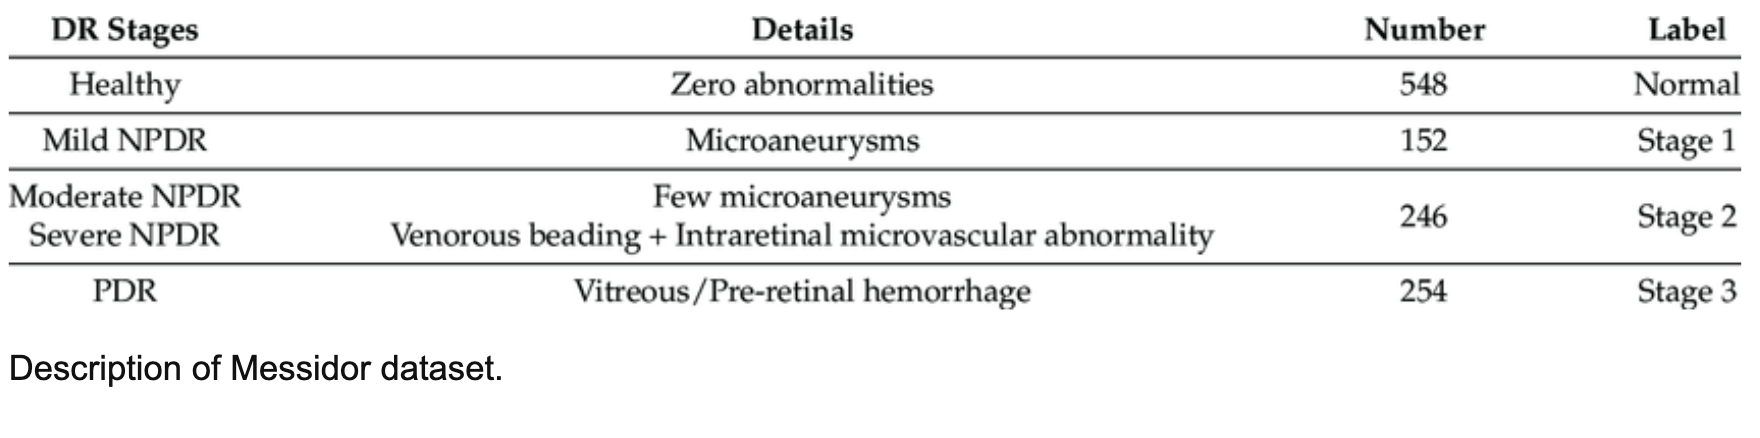

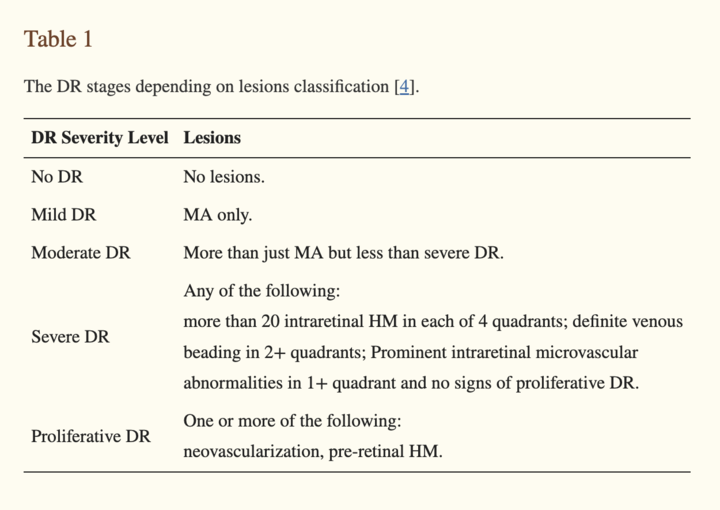

### Test Dataset Creation

In [12]:
df["Department"].value_counts()

Department
LaTIM - CHU de BREST                  400
Service Ophtalmologie Lariboisière    400
CHU de St Etienne                     400
Name: count, dtype: int64

In [13]:
# replacong the departments with letters for better visualization
df["Department"] = df["Department"].replace(
    {
        "LaTIM - CHU de BREST": "A",
        "Service Ophtalmologie Lariboisière": "B",
        "CHU de St Etienne": "C",
    }
)

```python

# shuffling the data
df = df.sample(frac=1, random_state=10).reset_index(drop=True)

# getting unique values from the target variable
lst = df["Retinopathy_Grade"].unique()
lst1 = df["Department"].unique()

test_indexes = []

req_samples = 2  # <- number of samples to be taken from each unique combination

# randomly sample X sample indexes from each unique value
for i in lst:
    for j in lst1:
        test_indexes.extend(
            df[(df["Retinopathy_Grade"] == i) & (df["Department"] == j)]
            .sample(req_samples)
            .index
        )

# train indexes
train_indexes = df.index.difference(test_indexes)

```

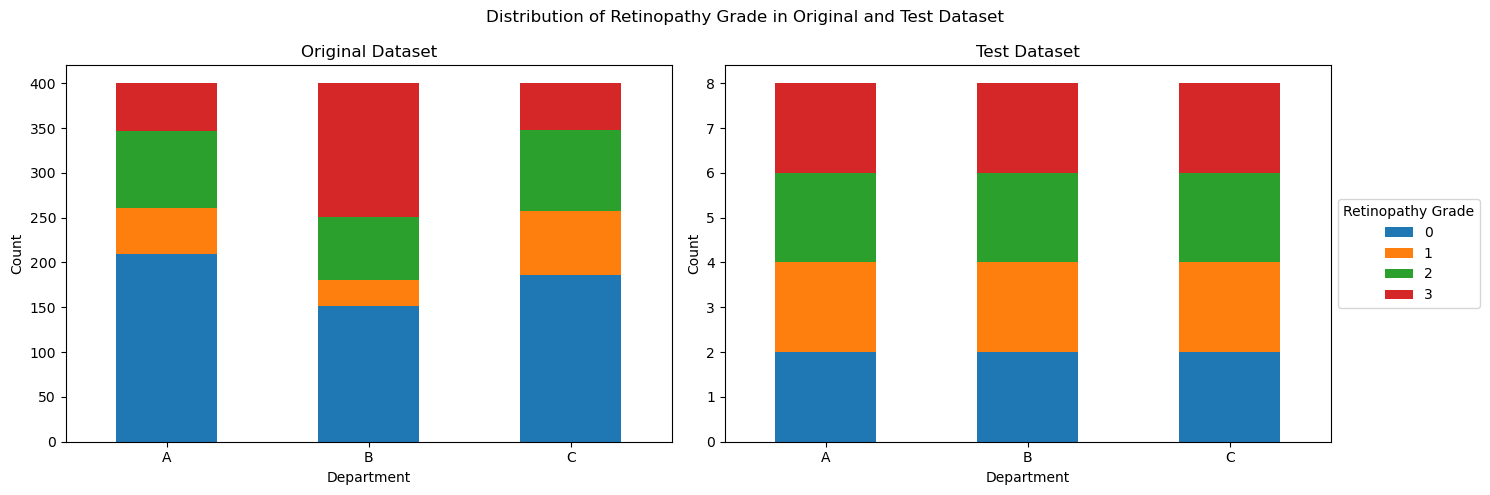

In [14]:
# plotting distribution of the target variable w.r.t the department in original dataset and test dataset side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df.groupby(["Department", "Retinopathy_Grade"]).size().unstack().plot(
    kind="bar", stacked=True, ax=ax[0]
)
ax[0].set_title("Original Dataset")
ax[0].set_ylabel("Count")
ax[0].xaxis.set_tick_params(rotation=0)
# removing the legend
ax[0].get_legend().remove()


df[df["Split"] == "Test"].groupby(
    ["Department", "Retinopathy_Grade"]
).size().unstack().plot(kind="bar", stacked=True, ax=ax[1])
ax[1].set_title("Test Dataset")
ax[1].xaxis.set_tick_params(rotation=0)
ax[1].set_ylabel("Count")

# adding common title
plt.suptitle("Distribution of Retinopathy Grade in Original and Test Dataset")

# adding common legend for both plots
plt.legend(
    title="Retinopathy Grade",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    labels=["0", "1", "2", "3"],
)
plt.tight_layout()
plt.show()

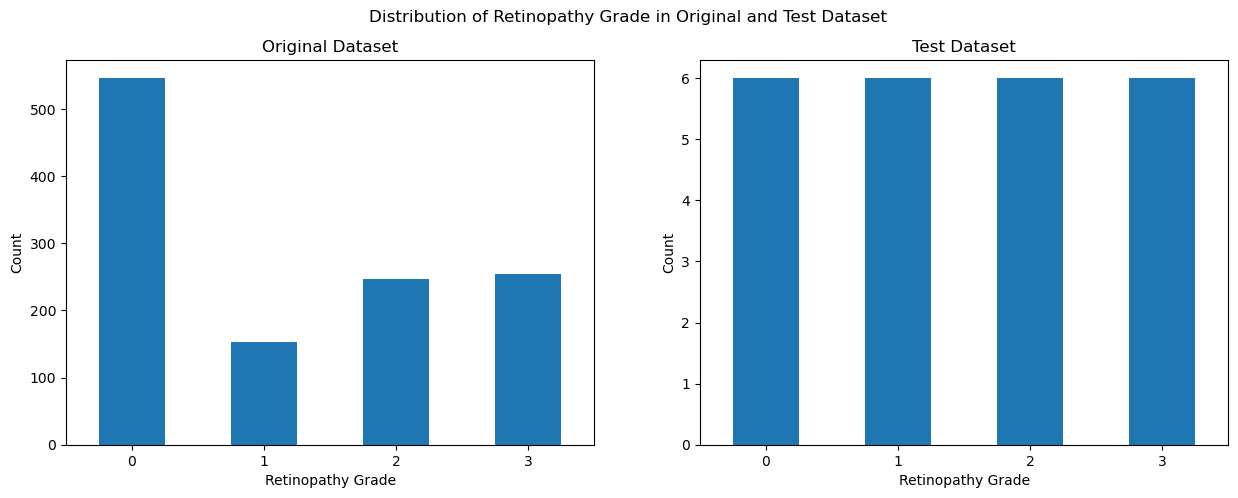

In [15]:
# plotting distribution of target variable side by side for original and test dataset
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df["Retinopathy_Grade"].value_counts().sort_index().plot(kind="bar", ax=ax[0])
ax[0].set_title("Original Dataset")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Retinopathy Grade")
ax[0].xaxis.set_tick_params(rotation=0)

df[df["Split"] == "Test"]["Retinopathy_Grade"].value_counts().sort_index().plot(
    kind="bar", ax=ax[1]
)
ax[1].set_title("Test Dataset")
ax[1].set_xlabel("Retinopathy Grade")
ax[1].xaxis.set_tick_params(rotation=0)
ax[1].set_ylabel("Count")

# adding common title
plt.suptitle("Distribution of Retinopathy Grade in Original and Test Dataset")
plt.show()

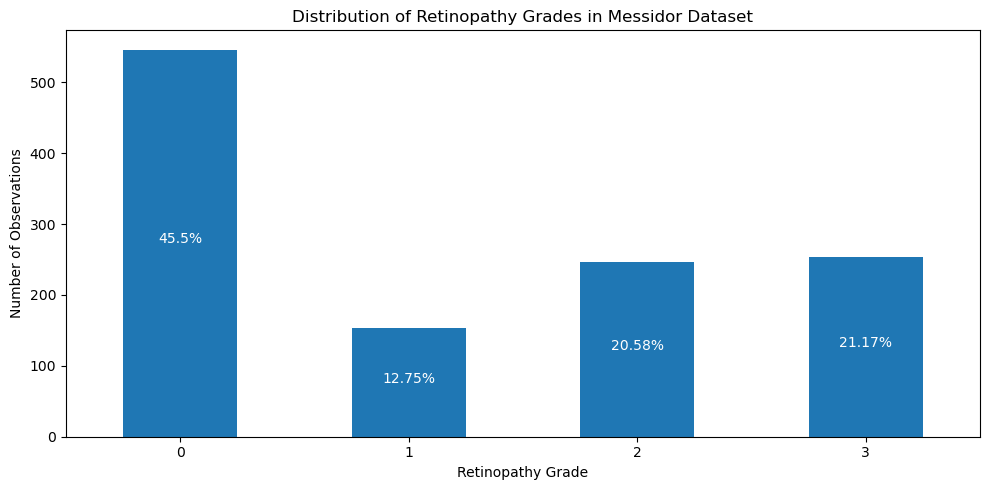

In [30]:
# plotting distribution of the target variable w.r.t the department in original dataset and test dataset side by side
plt.figure(figsize=(10, 5))
df.groupby(["Retinopathy_Grade"]).size().sort_index().plot(kind="bar", stacked=True)
# adding % values within the bars
# adding % in the bars
for i in range(4):
    plt.text(
        i,
        df["Retinopathy_Grade"].value_counts().sort_index().values[i] // 2,
        str(
            round(
                df["Retinopathy_Grade"]
                .value_counts(normalize=True)
                .sort_index()
                .values[i]
                * 100,
                2,
            )
        )
        + "%",
        ha="center",
        color="white",
    )
plt.title("Distribution of Retinopathy Grades in Messidor Dataset")
plt.ylabel("Number of Observations")
plt.xlabel("Retinopathy Grade")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()